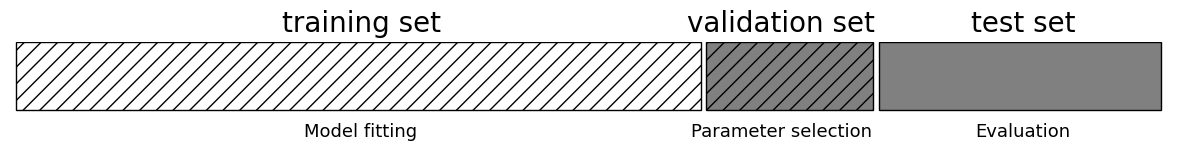

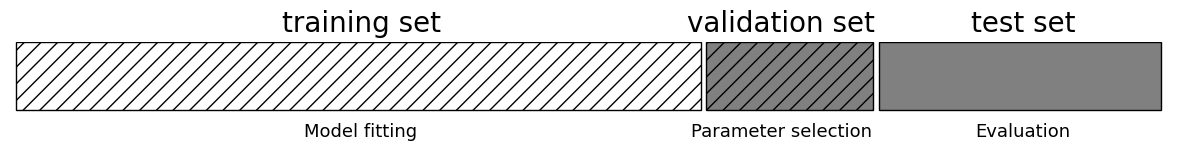

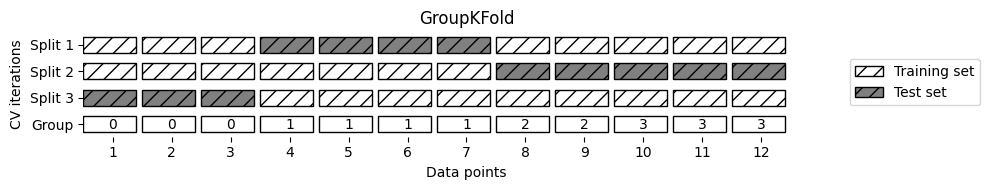

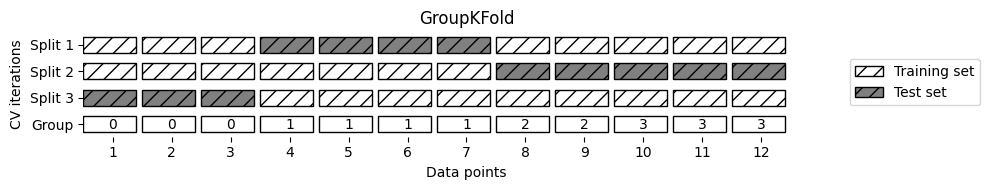

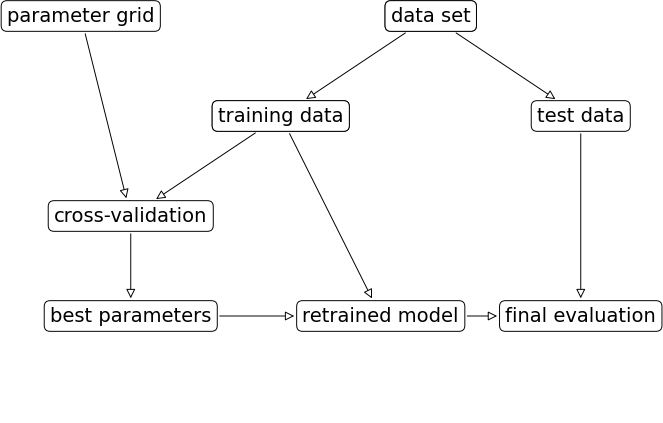

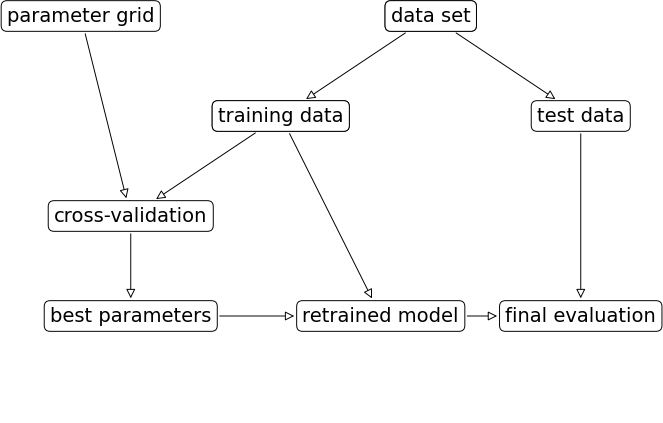

In [1]:
import matplotlib.pyplot as plt
from myst_nb import glue
from mglearn.plot_cross_validation import plot_group_kfold, plot_threefold_split
from mglearn.plot_grid_search import plot_grid_search_overview

# split plot
plot_threefold_split()
fig = plt.gcf()
glue("splitfig", fig, display=True)
plt.show()

# kfold plot
plot_group_kfold()
fig = plt.gcf()
glue("kfoldfig", fig, display=True)
plt.show()

# gs overview plot
plot_grid_search_overview()
fig = plt.gcf()
glue("gsoverview", fig, display=True)
plt.show()

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# create synthethic data set
X, y = make_classification(random_state=0)

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1)
# further split into train and validation set
X_train, X_val, y_train, y_val = train_test_split(
  X_train, y_train, test_size=0.25, random_state=3)

# print
print('train set shape: {}'.format(X_train.shape))
print('validation set shape: {}'.format(X_val.shape))
print('test set shape: {}'.format(X_test.shape))

train set shape: (60, 20)
validation set shape: (20, 20)
test set shape: (20, 20)


In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, cross_val_score

# split data into train and test set
X_train, X_test, y_train, y_test = train_test_split(
  X, y, test_size=0.2, random_state=1)

# define model
clf = LogisticRegression()

# define 3-fold cross validation procedure
kf = KFold(n_splits=3)

# compute performance for each fold
scores = cross_val_score(clf, X_train, y_train, cv=kf, scoring='accuracy')
print(scores)

[0.81481481 0.85185185 0.76923077]


In [4]:
from sklearn.model_selection import GridSearchCV
import pandas as pd

# we want to try different values for the regularization parameter C
param_grid = {'C' : [0.001, 0.01, 0.1, 1]}
clf = LogisticRegression()
kf = KFold(n_splits=3)

# define grid search
gs = GridSearchCV(
  estimator=clf,
  param_grid=param_grid,
  scoring=None, # use default scorer of LR (accuracy)
  refit=True,
  cv=kf,
)

# fit model
gs.fit(X_train, y_train)

# view cross-validation results
display(pd.DataFrame(gs.cv_results_)[['param_C', 'mean_test_score', 'std_test_score']])
print('best parameter: {}'.format(gs.best_params_))

# view test set result
print('test set accuracy: {:.2f}'.format(gs.score(X_test, y_test)))

,param_C,mean_test_score,std_test_score
0,0.001,0.597816,0.124481
1,0.01,0.734568,0.165865
2,0.1,0.799620,0.064185
3,1,0.811966,0.033790


best parameter: {'C': 1}
test set accuracy: 0.75
